Nous allons d'abords importer les libraries nécéassaires : 


*   numpy : pour la manipulation des tableaux
*   matplotlib : pour la visualisation en 2 D
*   DBSCAN de sklearn.cluster : pour utiliser l'algorithme DBSCAN






In [0]:
import numpy as np 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt

Ici nous allons uploader notre dataset en utilisant pandas, ensuite on visualise les 3 premiéres lignes des données.

In [39]:
from google.colab import files
files.upload()

Saving dataset.xlsx to dataset.xlsx


{'dataset.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [41]:
import pandas as pd

weather_df = pd.read_excel('dataset.xlsx')
print ("Shape of the DataFrame: ", weather_df.shape)
weather_df.head(3) 

Shape of the DataFrame:  (1999, 12)


,STATION,STATION_NAME,LATITUDE,LONGITUDE,LATLONG,AvgTemp,MaxTemp,MinTemp,StateName,Zip,State,Date
0,GHCND:USW00094746,WORCESTER MA US,42.2706,-71.8731,"42.2706, -71.8731",58.0,68.0,51.0,Massachusetts,1602.0,MA,10/13/15 12:00 AM
1,GHCND:USR0000ACKN,CHICKEN ALASKA AK US,64.0600,-141.9294,"64.06, -141.9294",27.0,39.0,17.0,Alaska,99732.0,AK,2015-01-10 00:00:00
2,GHCND:USR0000ACHT,CHITNA ALASKA AK US,61.5319,-144.4397,"61.5319, -144.4397",34.0,45.0,24.0,Alaska,99566.0,AK,2015-01-10 00:00:00


D'abords on va s'assurer que notre dataset ne contient pas des valeurs indéfinis (NaN) : 

*   MinTemp : température min
*   MaxTemp : température max
*   AvgTemp : température moyenne






In [42]:
weather_df.dropna(subset=['MinTemp', 'MaxTemp', 'AvgTemp'], inplace=True)
print ("After Dropping Rows that contains NaN on Mean, Max, Min Temperature Column: ", weather_df.shape)

After Dropping Rows that contains NaN on Mean, Max, Min Temperature Column:  (1999, 12)


On installe ici les libraries nécéssaires  pour la visualisation graphique

In [7]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 28 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (1,052 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 132681 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-

Ici nous allons afficher les stations de notre dataset sur la carte des USA en utilisant la librarie basemap

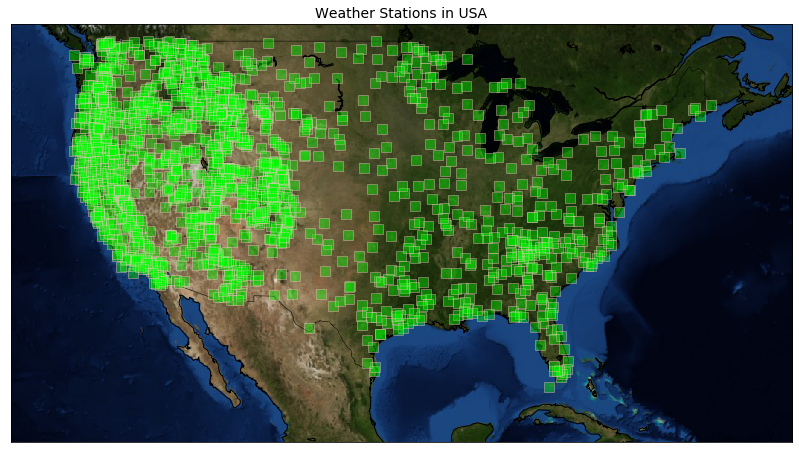

In [64]:
from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
#print (matplotlib.__version__)
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

# defining longitude and lattitude boundaries of canada

llon=-130
ulon=-60
llat=20
ulat=50

# selecting the boundaries of the map from lattitude and longitude 

weather_df = weather_df[(weather_df['LONGITUDE'] > llon) & (weather_df['LONGITUDE'] < ulon) & 
                        (weather_df['LATITUDE'] > llat) &(weather_df['LATITUDE'] < ulat)]

# we creat a map with  Mercator projection and using lat & long boundaries

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

# for better visualisation

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
my_map.bluemarble()

# To collect data based on stations, here  Latitude and Longitude are converted to x/y map projection coordinates        

xs,ys = my_map(np.asarray(weather_df['LONGITUDE']), np.asarray(weather_df['LATITUDE']))
weather_df['xm']= xs.tolist()
weather_df['ym'] =ys.tolist()

# Stations visualization on map
for index,row in weather_df.iterrows():
   my_map.plot(row.xm, row.ym,markerfacecolor ='lime',markeredgecolor='pink', marker='s', markersize= 10, alpha = 0.4)
plt.title("Weather Stations in USA", fontsize=14)
plt.savefig("USA_WS.png", dpi=300)
plt.show()

Pour effectuer le clustering sur nos données nous allons selctionnés que les 5 features suivantes : "MinTemp", "MaxTemp", "AvgTemp", "xm", "ym", et nous allons utiliser DBSCAN de skitlearn

In [65]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
weather_df_clus_temp = weather_df[["MinTemp", "MaxTemp", "AvgTemp", "xm", "ym"]]
weather_df_clus_temp = StandardScaler().fit_transform(weather_df_clus_temp)

db = DBSCAN(eps=0.5, min_samples=10).fit(weather_df_clus_temp)
labels = db.labels_
print (labels[0:10])
weather_df["Clus_Db"]=labels

[-1  0 -1 -1  1  0  0  0  0  0]


le nombre de classes résultant avec eps = 0.5 est de 10 cluster avec la classe -1 pour les points abérants

In [66]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Pour la visualisation nous allons afficher chaque cluster sur la carte avec une couleur différente et les points abérants avec du gris.

In [0]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

Cluster 0, Average Mean Temp: 57.06511976047904
Cluster 1, Average Mean Temp: 60.73148148148148
Cluster 2, Average Mean Temp: 74.31428571428572
Cluster 3, Average Mean Temp: 79.51612903225806
Cluster 4, Average Mean Temp: 49.09090909090909
Cluster 5, Average Mean Temp: 49.63636363636363


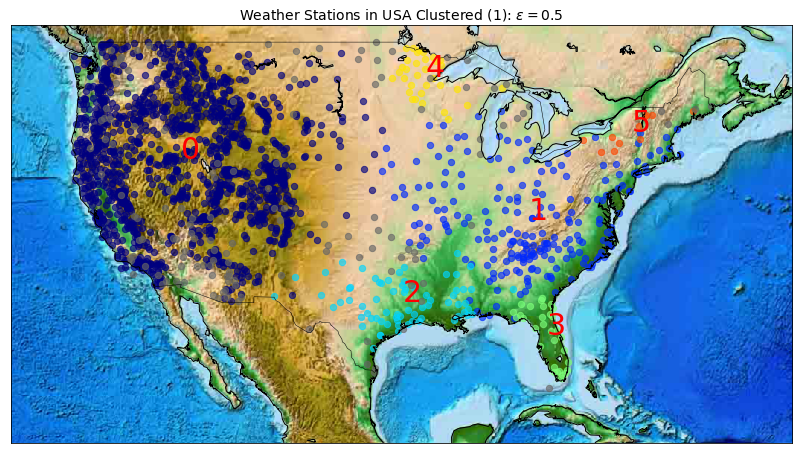

In [75]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map.etopo()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = weather_df[weather_df.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=30, color='red',)
        print ("Cluster "+str(clust_number)+', Average Mean Temp: '+ str(np.mean(clust_set.AvgTemp)))
plt.title(r"Weather Stations in USA Clustered (1): $ \epsilon = 0.5$", fontsize=14)        
plt.savefig("etopo_cluster.png", dpi=300)

Ici nous allons répéter le meme processus avec eps = 0.6 > 0.5, on remarque le nombre de cluster a diminuer puisque on a augmenté la distance maximale entre deux stations pour que l'un soit considéré comme voisin de l'autre

In [72]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
weather_df_clus_temp = weather_df[["MinTemp", "MaxTemp", "AvgTemp", "xm", "ym"]]
weather_df_clus_temp = StandardScaler().fit_transform(weather_df_clus_temp)

db = DBSCAN(eps=0.6, min_samples=10).fit(weather_df_clus_temp)
labels = db.labels_
print (labels[0:10])
weather_df["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

[1 0 0 0 1 0 0 0 0 0]


Cluster 0, Average Mean Temp: 57.06511976047904
Cluster 1, Average Mean Temp: 60.73148148148148
Cluster 2, Average Mean Temp: 74.31428571428572
Cluster 3, Average Mean Temp: 79.51612903225806
Cluster 4, Average Mean Temp: 49.09090909090909
Cluster 5, Average Mean Temp: 49.63636363636363


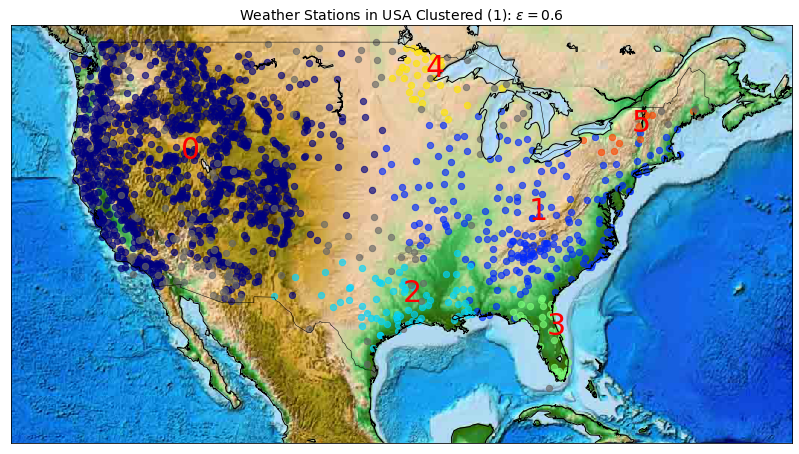

In [76]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map.etopo()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = weather_df[weather_df.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=30, color='red',)
        print ("Cluster "+str(clust_number)+', Average Mean Temp: '+ str(np.mean(clust_set.AvgTemp)))
plt.title(r"Weather Stations in USA Clustered (1): $ \epsilon = 0.6$", fontsize=14)        
plt.savefig("etopo_cluster.png", dpi=300)